In [1]:
# %matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource

In [2]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [3]:
n_qubits = 2
D = 101
betas_res = 100
gammas_res = 100
path = "concurrences/batch_instates/"
# path = "concurrences/batch_coins/"
betas = np.linspace(0,np.pi/2,betas_res)
gammas = np.linspace(0,2*np.pi,gammas_res)
averages = np.zeros((betas_res,gammas_res),np.longdouble)
for b in range(betas_res):
    for g in range(gammas_res):
        n = b * gammas_res + g
        filename = str(n) + ".txt"
        concurrences = np.genfromtxt("C:/dev/Multicqw/data/"+path+filename, usecols = 0, delimiter=",", dtype = np.longdouble)
        averages[b,g] = np.average(concurrences)

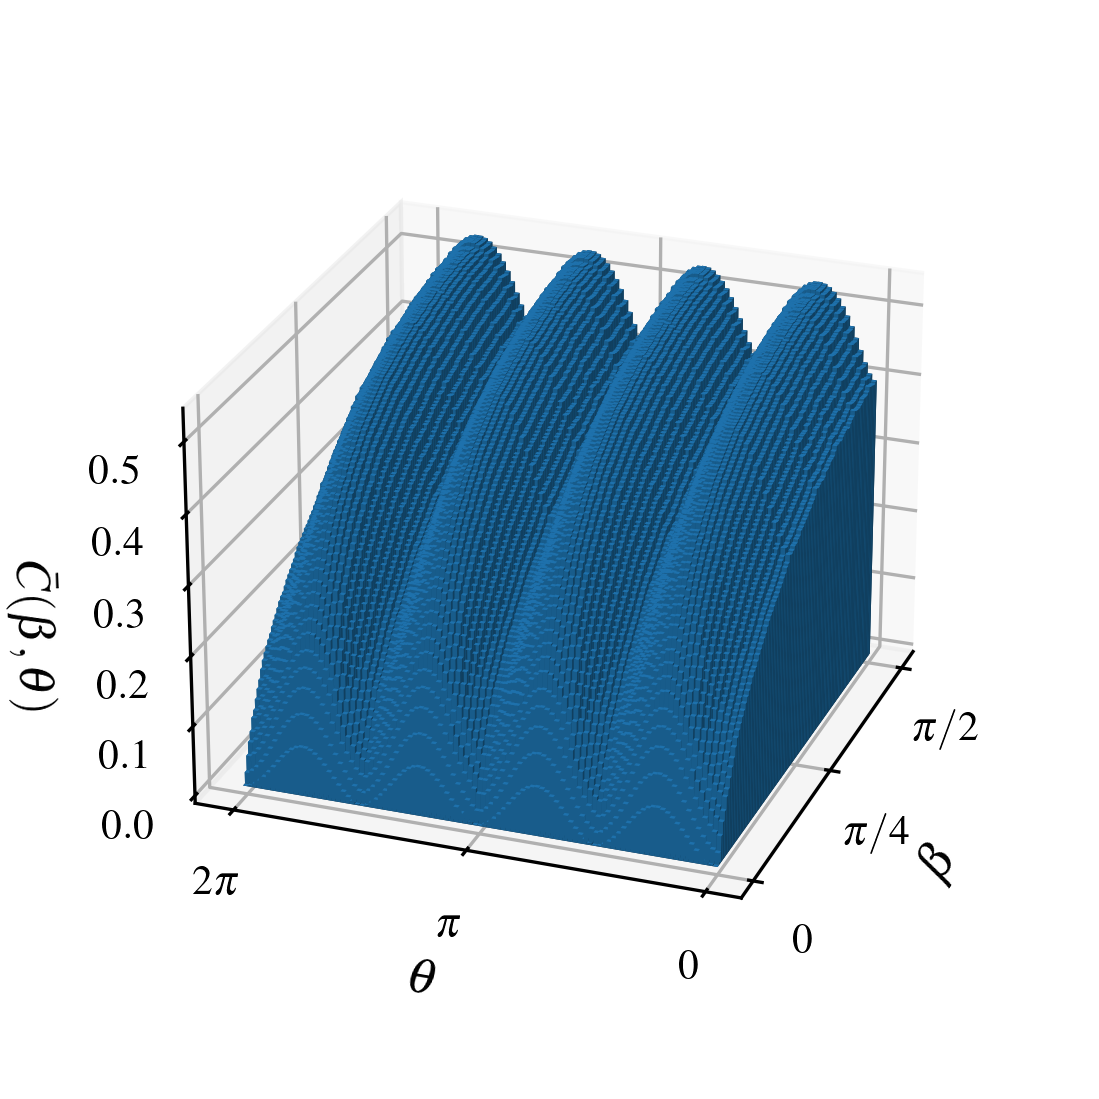

In [4]:
_xx, _yy = np.meshgrid(betas, gammas)
x, y = _xx.ravel(), _yy.ravel()
width = np.max(betas)/betas_res
depth = np.max(gammas)/gammas_res
light = LightSource(azdeg=315,altdeg=60)
fig = plt.figure(figsize=(6,4.5),dpi=300)
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=25,azim=-160,roll=0)
ax.set_xlabel(r'$\beta$',fontsize=12)
ax.set_xticks([0,np.pi/4,np.pi/2],[r'$0$',r'$\pi/4$',r'$\pi/2$'])
ax.set_ylabel(r'$\theta$',fontsize=12)
ax.set_yticks([0,np.pi,2*np.pi],[r'$0$',r'$\pi$',r'$2\pi$'])
# ax.set_ylabel(r'$\gamma$',fontsize=12)
ax.set_zlabel(r'$\bar{C}(\beta,\theta)$',fontsize=12)
# ax.set_zlabel(r'$\bar{C}(\beta,\gamma)$',fontsize=12)
ax.set_box_aspect(None, zoom=0.85)
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5
ax.zaxis.labelpad = 5
ax.bar3d(x,y,0,width,depth,averages.flatten('F'),lightsource=light)

In [5]:
print(np.argmax(averages[betas_res-1,:]))

37


In [6]:
print(gammas[37])

2.3482611754105527


Text(0, 0.5, '$\\bar{C}(\\pi/2,\\theta)$')

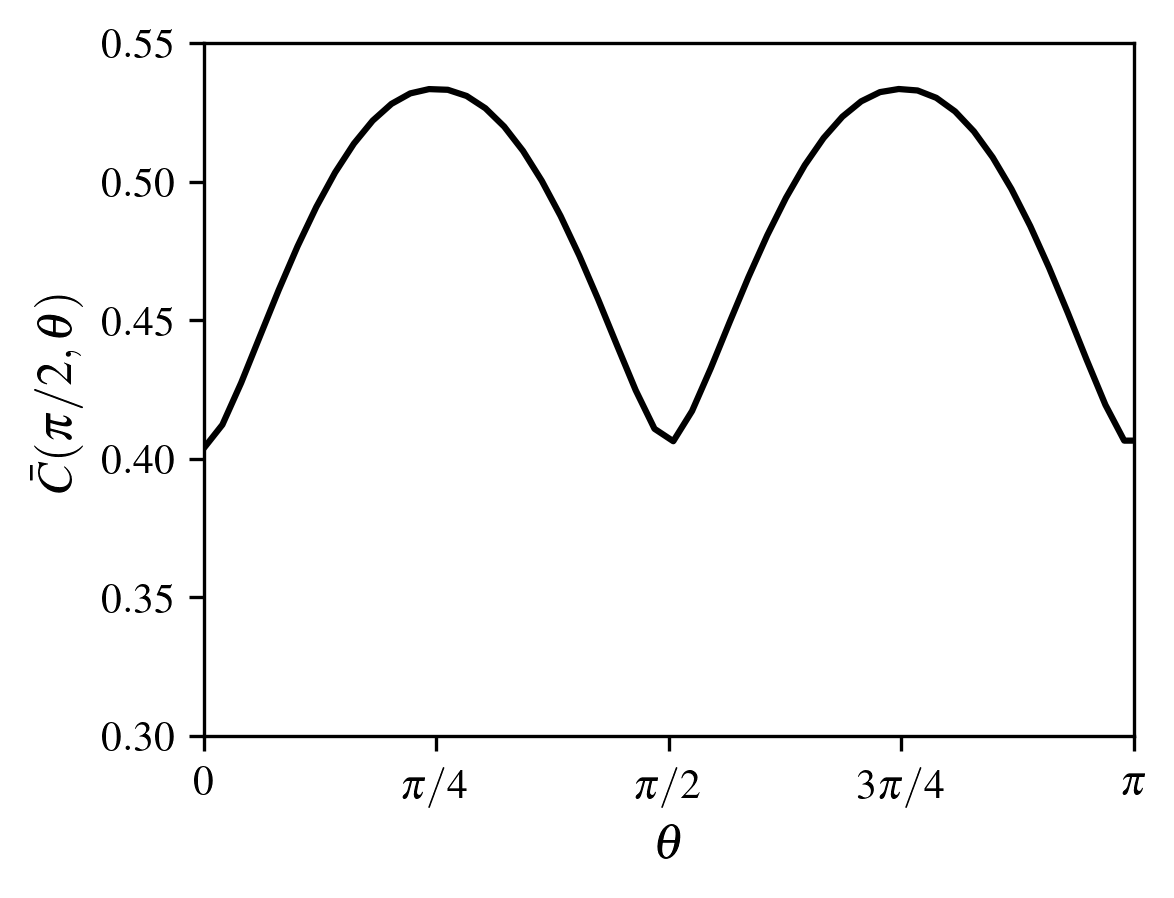

In [7]:
fig = plt.figure(figsize=(4,3),dpi=300)
ax = fig.subplots()
ticks = [0,np.pi/4,np.pi/2,3*np.pi/4,np.pi]
labels = ['0',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$']
ax.plot(gammas,averages[betas_res-1,:],'k')
ax.set_xticks(ticks,labels)
ax.set_xlim(0,np.pi)
ax.set_ylim(0.300,0.55)
ax.set_xlabel(r'$\theta$',fontsize=12)
ax.set_ylabel(r'$\bar{C}(\pi/2,\theta)$',fontsize=12)